In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
rating = pd.read_csv('rating.csv')

In [5]:
movie = pd.read_csv('movie.csv')

In [19]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    object
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [16]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [102]:
rating.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [20]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [17]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [106]:
len(movie.title.unique())

27262

In [29]:
combined = pd.merge(rating, movie, on='movieId')
combined

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
20000258,138301,121017,3.5,2015-01-06 15:34:39,The Gentleman from Epsom (1962),Comedy|Crime
20000259,138301,121019,4.5,2015-01-06 15:36:46,The Great Spy Chase (1964),Action|Comedy|Thriller
20000260,138301,121021,4.5,2015-01-06 15:38:07,Taxi for Tobruk (1961),Drama|War
20000261,138406,110167,4.5,2014-03-30 12:55:27,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama


In [15]:
rating.groupby('rating').count()

,userId,movieId,timestamp
rating,,,
0.5,239125,239125,239125
1.0,680732,680732,680732
1.5,279252,279252,279252
2.0,1430997,1430997,1430997
2.5,883398,883398,883398
3.0,4291193,4291193,4291193
3.5,2200156,2200156,2200156
4.0,5561926,5561926,5561926
4.5,1534824,1534824,1534824


In [32]:
movie_rating = pd.DataFrame(combined.groupby('title').mean()['rating'])
movie_rating

,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091
$ellebrity (Sellebrity) (2012),2.000000
...,...
À propos de Nice (1930),3.125000
Árido Movie (2005),2.000000
Åsa-Nisse - Wälkom to Knohult (2011),1.500000


In [100]:
movie_rating.sort_values('rating', ascending=False)

avg_movie_ratings = pd.DataFrame(combined.groupby('title').mean()['rating'])
avg_movie_ratings_top_20 = avg_movie_ratings.sort_values('rating', ascending=False).head(20)
avg_movie_ratings_top_20

,rating
title,
Small Roads (2011),5.0
Divorce (1945),5.0
The Beautiful Story (1992),5.0
Into the Middle of Nowhere (2010),5.0
The Sea That Thinks (2000),5.0
The Wrecking Crew (2008),5.0
Marihuana (1936),5.0
No Distance Left to Run (2010),5.0
Stargate SG-1 Children of the Gods - Final Cut (2009),5.0


Text(0, 0.5, 'Movie titles')

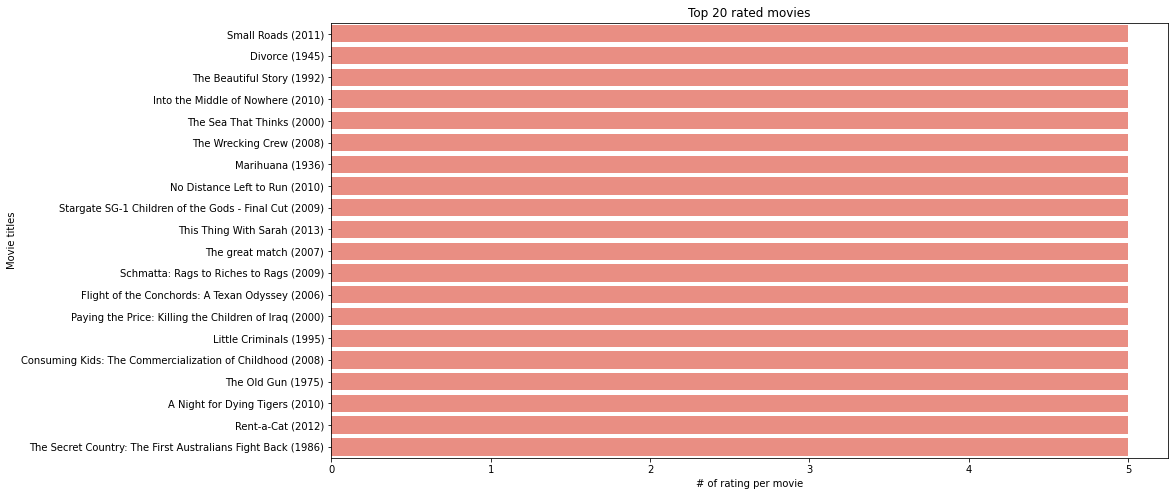

In [101]:
#Top 15 rated movies
plt.figure(figsize=(15,8))
sns.barplot(avg_movie_ratings_top_20['rating'], avg_movie_ratings_top_20.index, color="salmon")
plt.title('Top 20 rated movies')
plt.xlabel('# of rating per movie')
plt.ylabel('Movie titles')

In [67]:
movie_rating_count = pd.DataFrame(combined.groupby('title').count()['rating'])
movie_rating_count_top_15 = movie_rating_count.sort_values('rating', ascending=False).head(15)
movie_rating_count_top_15

,rating
title,
Pulp Fiction (1994),67310
Forrest Gump (1994),66172
"Shawshank Redemption, The (1994)",63366
"Silence of the Lambs, The (1991)",63299
Jurassic Park (1993),59715
Star Wars: Episode IV - A New Hope (1977),54502
Braveheart (1995),53769
Terminator 2: Judgment Day (1991),52244
"Matrix, The (1999)",51334


Text(0, 0.5, 'Movie titles')

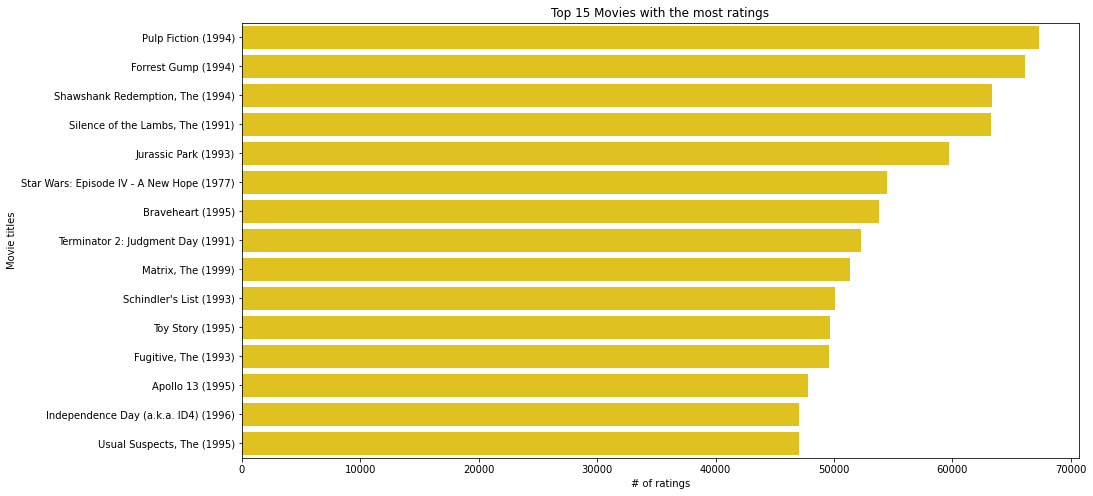

In [68]:
#Top 15 movies with the most ratings
plt.figure(figsize=(15,8))
sns.barplot(movie_rating_count_top_15['rating'], movie_rating_count_top_15.index, color="gold")
plt.title('Top 15 Movies with the most ratings')
plt.xlabel('# of ratings')
plt.ylabel('Movie titles')

In [85]:
movie_rating_count_top_15.index.tolist()

['Pulp Fiction (1994)',
 'Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'Jurassic Park (1993)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 'Matrix, The (1999)',
 "Schindler's List (1993)",
 'Toy Story (1995)',
 'Fugitive, The (1993)',
 'Apollo 13 (1995)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Usual Suspects, The (1995)']

Text(0, 0.5, 'Movie titles')

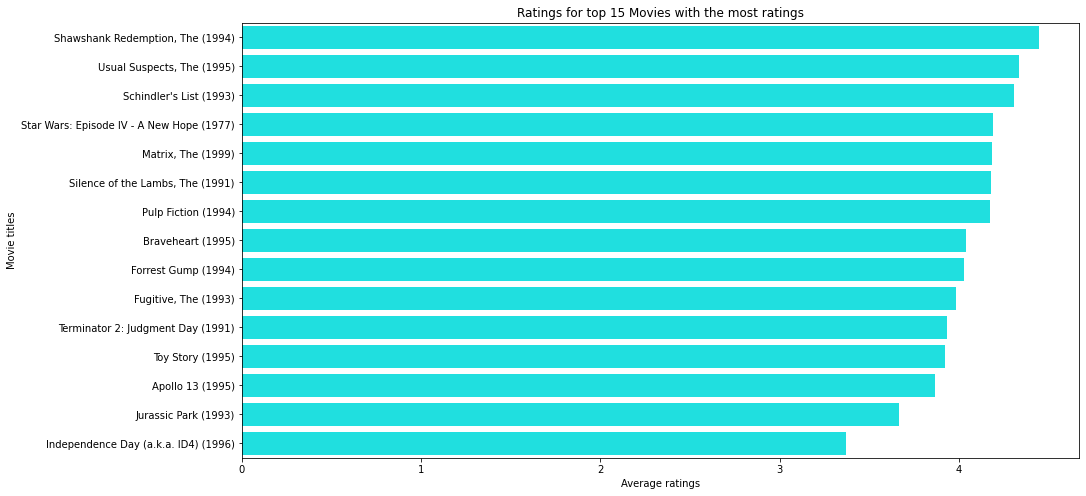

In [99]:
actual_rating = pd.DataFrame(combined[combined['title'].isin(movie_rating_count_top_15.index.tolist())].groupby('title').mean()['rating'])
actual_rating.sort_values('rating', ascending=False)


#Ratings for top 15 Movies with the most ratings
plt.figure(figsize=(15,8))
sns.barplot(actual_rating.sort_values('rating', ascending=False)['rating'], actual_rating.sort_values('rating', ascending=False).index, color="aqua")
plt.title('Ratings for top 15 Movies with the most ratings')
plt.xlabel('Average ratings')
plt.ylabel('Movie titles')

In [ ]:
df[df['A'].isin([3, 6])]